# Análisis de componente principales PCA 

In [0]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

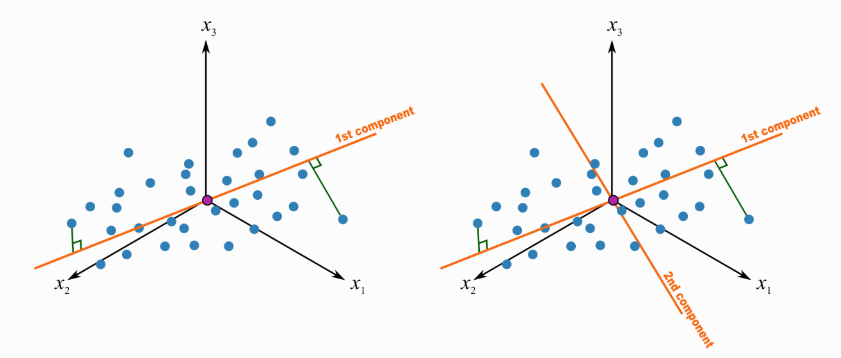

In [0]:
#uploaded = files.upload()
#Image("temp.png")

Tenemos una matriz de datos  $\textbf{X}_{n\times p}:$ n observaciones, p características y buscamos la proyección de los datos que maximiza la varianza.

Estimamos su matriz de covarianzas como:

$$\mathbf{S}=\frac{1}{n-1} \mathbf{X}^{T} \mathbf{X}$$.

Ahora, una proyección de los datos la podemos encontrar mediante el producto 


$$Proy(\text{u},\text{X})=\text{u}^T\text{X}$$


El problema de optimización es:

\begin{align}
\operatorname{máx}_{\mathbf{u}} \operatorname{Var}\left(\mathbf{u}^{T} \mathbf{X}\right)&=\frac{1}{n-1} \operatorname{máx}_{\mathbf{u}}\mathbf{u}^{T}\mathbf{X}^{T} \mathbf{X}\mathbf{u}\\
&=\operatorname{máx}_{\mathbf{u}}\mathbf{u}^{T} \mathbf{S} \mathbf{u}
\end{align}
con  $\|\mathbf{u}\|^{2}=1$.


De modo que podemos expresarlo como un problema de optimización con restricciones:

\begin{align}
\mathcal{L}(\mathbf{u}, \lambda)&=\mathbf{u}^{T} \mathbf{S} \mathbf{u}-\lambda\left(\mathbf{u}^{T} \mathbf{u}-1\right)\\
\nabla \mathcal{L}(\mathbf{u}, \lambda)&=\mathbf{S} \mathbf{u}-\lambda \mathbf{u}=0
\end{align}

entonces

$$\mathbf{S u}=\lambda \mathbf{u}$$ 

que es un problema de valores propios y podemos resolver mediante la descomposición espectral de $\textbf{S}$, es decir:

$$\textbf{S}=\textbf{U} \Lambda \textbf{U}´$$ 

donde $\textbf{U}$ contiene los eigenvectores normalizados de $\textbf{S}$ y $\Lambda$ es una matriz diagonal con los eigenvalores ordenados de mayor a menor.

De modo que podemos obtener la representación de $\textbf{X}$ en su iésimo componente principales usando

$$\textbf{y}_i=\text{u}_i^T\text{X}$$

y al tomar m componentes principales, la cantidad de varianza acumulada está dada por:

$$
\frac{\sum_{i=1}^m\lambda_i}{tr(\Lambda)}
$$



In [0]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

X= array([[1, 5], [3, 2], [15, 6]])
print(X)

[[ 1  5]
 [ 3  2]
 [15  6]]


In [0]:
#Estandarizamos
Mu = mean(X.T, axis=1)
X_est = X-Mu
print(X_est)

[[-5.33333333  0.66666667]
 [-3.33333333 -2.33333333]
 [ 8.66666667  1.66666667]]


In [0]:
#Estimamos la covarianza
S = cov(X_est.T)
print(S)

[[57.33333333  9.33333333]
 [ 9.33333333  4.33333333]]


In [0]:
# Sacamos los Eigenvectores y eigenvalores
lam, U = eig(S)
print(U)
print(lam)

[[ 0.98570005 -0.1685094 ]
 [ 0.1685094   0.98570005]]
[58.92890436  2.73776231]


In [0]:
#Varianza acumulada
(lam[0]+lam[1])/sum(lam)

1.0

In [0]:
# Proyección
y = vectors.T.dot(X_est.T)
print(y.T)

[[-3.29983165  4.24264069]
 [-4.00693843  0.70710678]
 [ 7.30677007 -4.94974747]]


In [0]:
np.reshape(y[0,:],(3,1))

array([[-3.29983165],
       [-4.00693843],
       [ 7.30677007]])

In [1]:
!pip install opencv-python
!pip install easydev
!pip install colormap

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for easydev: filename=easydev-0.9.38-cp36-none-any.whl size=72215 sha256=8c73833dd4417cb0697124e39fbdcba15192bee1dba87209f02377a404d2145b
  Stored in directory: /root/.cache/pip/wheels/38/93/b7/c4ee5cf6eb4011f7db6467465fe2fb280bbb224a61400bd8a6
Successfully built easydev
  Created wheel for colormap: filename=colormap-1.0.3-cp36-none-any.whl size=15560 sha256=b82ada293c9d6842a0e86a857170465899e910c5d09d9ee5f69f473a40ffc23a
  Stored in directory: /root/.cache/pip/wheels/b5/c4/23/5f5d3e77fb0d00f44ee147a9cbb3acb641b9ebe2f3d5406c66
Successfully built colormap


In [2]:
import matplotlib.pylab as plt
import numpy as np
import cv2
import os
import glob
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from colormap import rgb2hex
import pandas as pd
from sklearn.decomposition import PCA
from google.colab import drive 
from google.colab import files
from IPython.display import Image
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
img_dir = "/content/gdrive/My Drive/Programmathon/data_fruits" 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
B,G,R=[],[],[]
im_m=np.zeros((np.shape(files)[0],3))
for i,f1 in enumerate(files):
    img = cv2.imread(f1)
    #b=cv2.split(img)
    R.append(cv2.split(img)[0])
    G.append(cv2.split(img)[1])
    B.append(cv2.split(img)[2])
    im_m[i,0]=np.median(img[:,:,0])   #medianR
    im_m[i,1]=np.median(img[:,:,1])   #medianG
    im_m[i,2]=np.median(img[:,:,2])   #medianB
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(RGB_img)

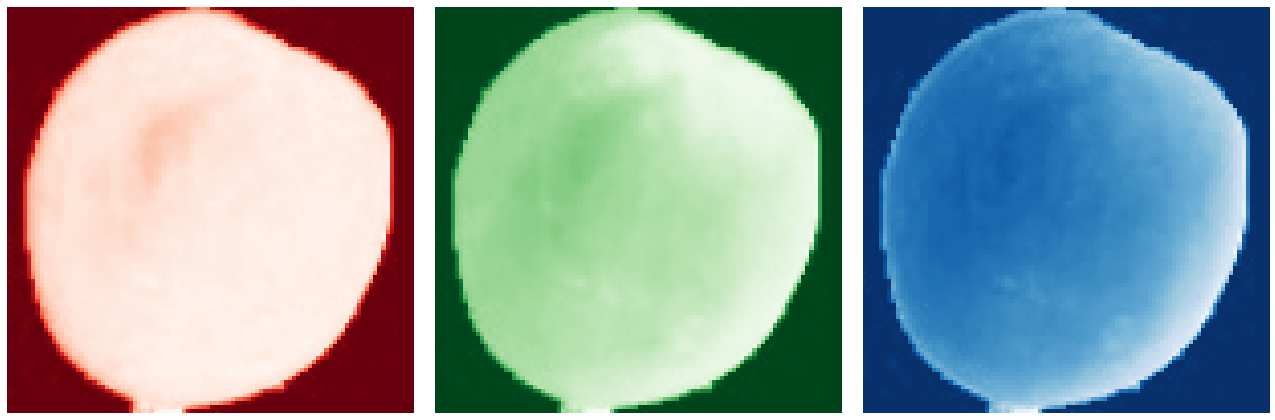

In [0]:
i=0
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(R[i], cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(G[i], cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(B[i], cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() 

In [0]:
np.shape(data)

(1300, 100, 100, 3)

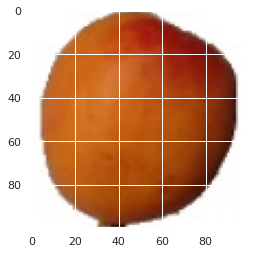

In [0]:
plt.imshow(data[i])

In [0]:
medianas.shape

(1300, 3)

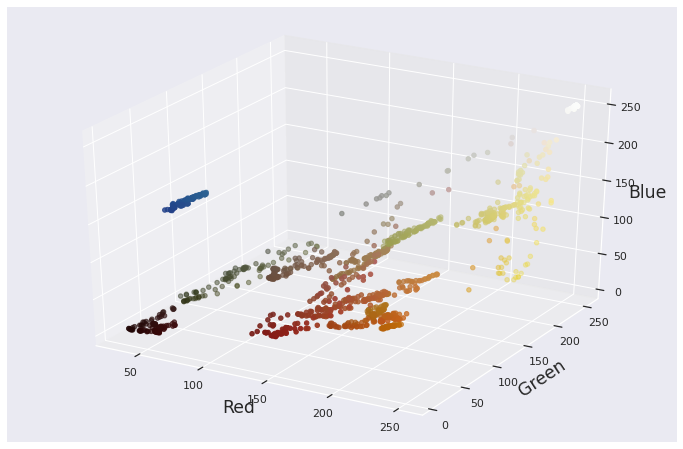

In [0]:
images=[]
for j in range(1300):
    im = plt.imread(files[j])
    images.append(im)
    
medianas=[]
for j in range(np.shape(B)[0]):
    medianas.append(np.array([np.median(B[j]),np.median(G[j]),np.median(R[j])]))
medianas=np.array(medianas)

def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)
labels=[]

for j in range(np.shape(medianas)[0]):
    labels.append(rgb2hex(int(medianas[j,0]),int(medianas[j,1]),int(medianas[j,2])))

r=medianas[:,0]
g=medianas[:,1]
b=medianas[:,2]
fig = plt.figure(figsize=(12,8))
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

axis.scatter(r, g, b, c=labels, marker="o")
axis.set_xlabel("Red",fontsize="x-large")
axis.set_ylabel("Green",fontsize="x-large")
axis.set_zlabel("Blue",fontsize="x-large")
plt.show()  


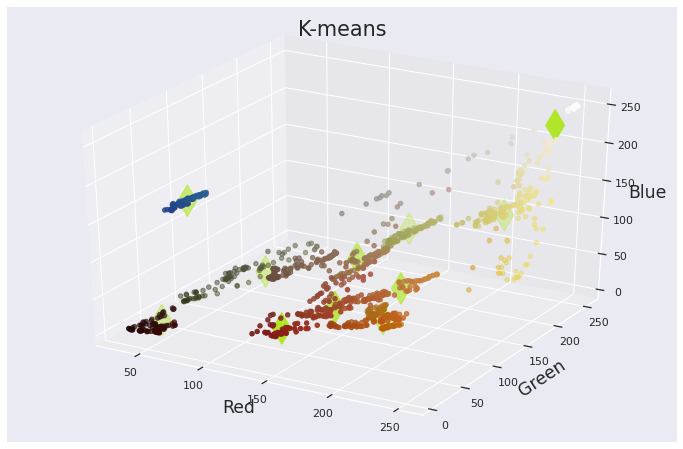

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans=kmeans.fit(medianas)
klabels=kmeans.labels_
cent=kmeans.cluster_centers_

r=medianas[:,0]
g=medianas[:,1]
b=medianas[:,2]
fig = plt.figure(figsize=(12,8))
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

axis.scatter(r, g, b, c=labels, marker="o")
axis.scatter(cent[:,0],cent[:,1],cent[:,2], marker="d",c="#b0e629",s=500)
axis.set_xlabel("Red",fontsize="x-large")
axis.set_ylabel("Green",fontsize="x-large")
axis.set_zlabel("Blue",fontsize="x-large")
plt.title("K-means",fontsize="xx-large")
plt.show()

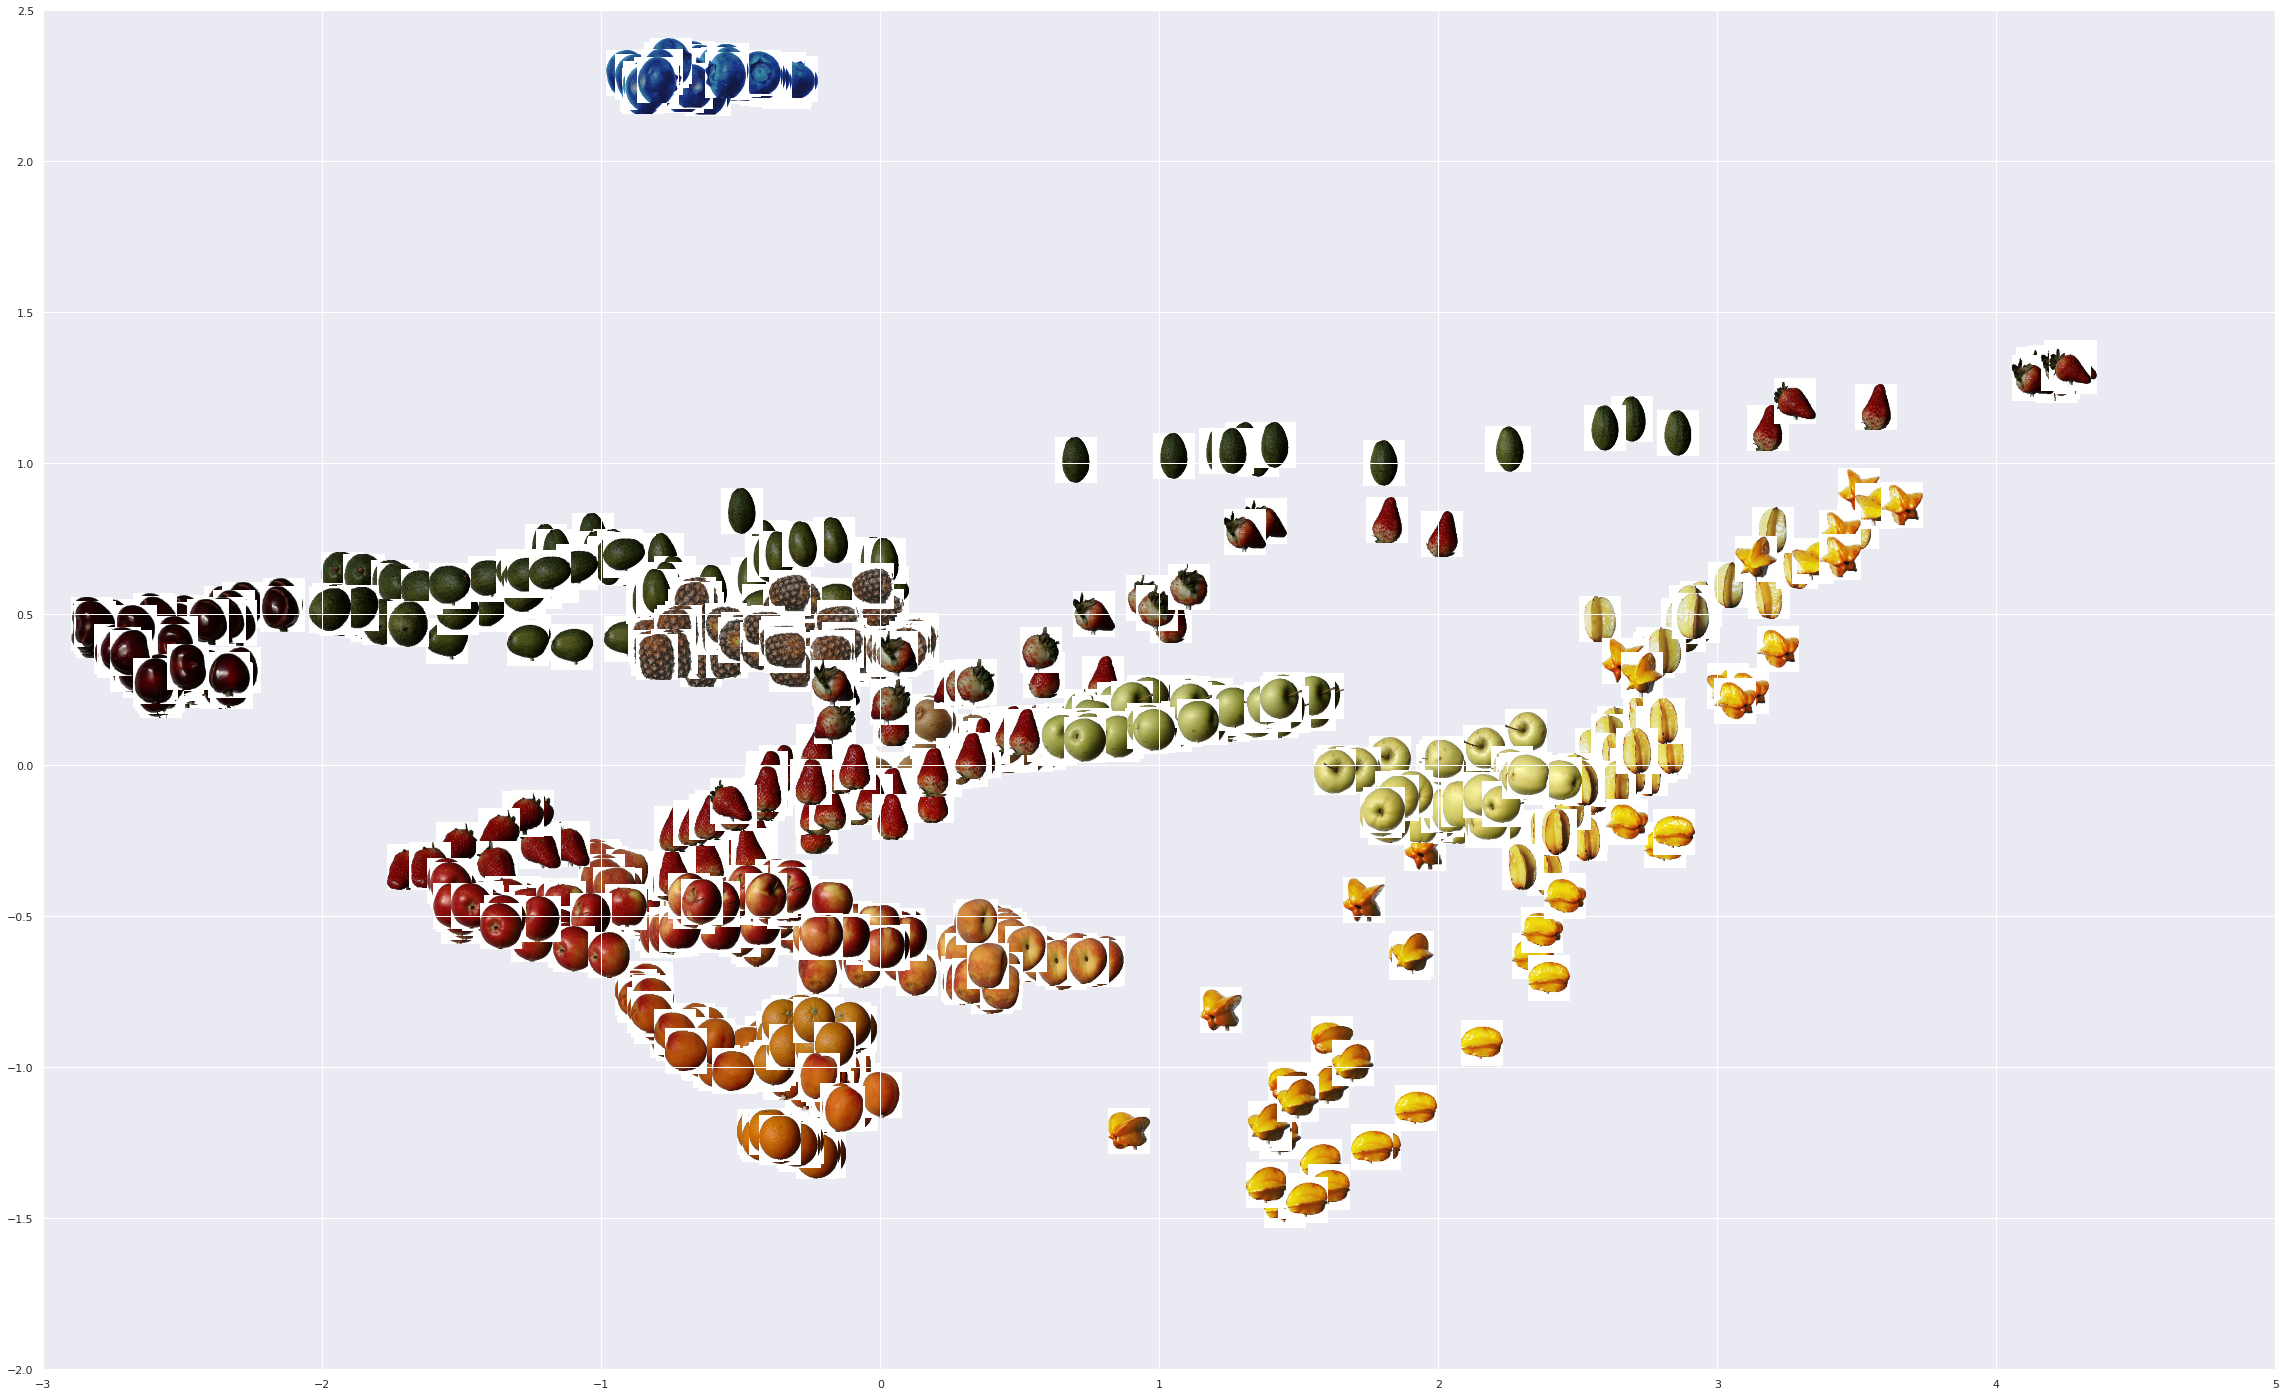

In [0]:
#Representacion de cada fruta por su proyeccion en dos componentes principales
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(im_m)
pca = PCA()
pca.fit(X)
proj = pd.DataFrame(pca.transform(X),columns = ['pc1','pc2','pc3'])

X = proj['pc1']
Y = proj['pc2']

# Create figure
fig = plt.figure(figsize=(40.,25.))
ax = fig.add_subplot(111)


# Plots an image at each x and y location. 
def plotImage(xData, yData,im):
    for x, y, imi in zip(xData,yData,im):
        bb = Bbox.from_bounds(x,y,.15,.15)  
        bb2 = TransformedBbox(bb,ax.transData)
        bbox_image = BboxImage(bb2,
                            norm = None,
                            origin=None,
                            clip_on=False)
        bbox_image.set_data(imi)
        ax.add_artist(bbox_image)

ax.set_ylim(-2,2.5)
ax.set_xlim(-3,5)
plotImage(X, Y, images)
plt.show()
#Código de Eva, Gracias Eva 

#Contacto:

Mail: javier.carrillo@cimat.mx

Ig: javcm_
